In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
import pickle
import datetime
from keras.models import model_from_yaml

Using TensorFlow backend.


In [18]:
img = cv2.imread('./dataset/karan/IMG_0367.JPG')
img.shape

(3088, 2320, 3)

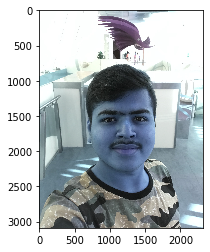

In [19]:
plt.imshow(img)

In [20]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(3088, 2320)

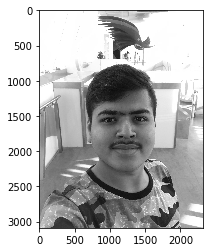

In [21]:
plt.imshow(gray, cmap='gray')

In [22]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 662, 1086, 1102, 1102]], dtype=int32)

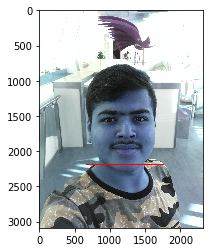

In [23]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

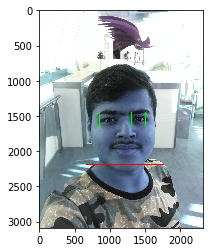

In [24]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

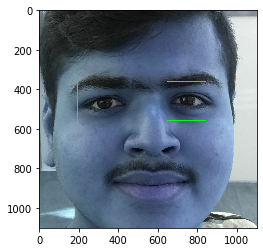

In [25]:
plt.imshow(roi_color, cmap='gray')

In [26]:
cropped_img = np.array(roi_color)
cropped_img.shape

(1102, 1102, 3)

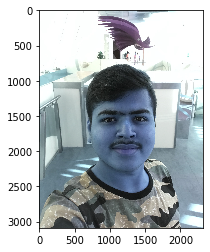

In [28]:
def cropped_image_for_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

original_image = cv2.imread('./dataset/karan/IMG_0367.JPG')
plt.imshow(original_image)

In [119]:
data_path = './dataset'
cropped_data_path = "./dataset/cropped/"  #Creating cropped images folder

img_dirs = []
for entry in os.scandir(data_path):     #Go through all sub-directories within dataset folder
    if entry.is_dir():
        img_dirs.append(entry.path)     #If sub-directories existed append them in list

img_dirs                                #Directories of celebrities 

['./dataset\\ben_afflek',
 './dataset\\elton_john',
 './dataset\\jasprit_bumrah',
 './dataset\\jay_shah',
 './dataset\\jerry_seinfeld',
 './dataset\\karan_sheth',
 './dataset\\lionel_messi',
 './dataset\\madonna',
 './dataset\\maria_sharapova',
 './dataset\\mindy_kaling',
 './dataset\\roger_federer',
 './dataset\\serena_williams',
 './dataset\\virat_kohli']

In [120]:
if os.path.exists(cropped_data_path):
    shutil.rmtree(cropped_data_path)    #deletes the entire directory tree
os.mkdir(cropped_data_path)

In [121]:
cropped_img_dirs = []               #List of cropped image directories inside dataset directory
celebrity_file_names_dict = {}

for img_dir in img_dirs:           #Selecting celebrity folders after each and every iteration 
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):        #Scanning images inside the current celebrity folder
        roi_color = cropped_image_for_2_eyes(entry.path)
        if roi_color is not None:   #If cropped image is returned store it in cropped folder with celebrity name at it's back
            cropped_folder = cropped_data_path + celebrity_name
            if not os.path.exists(cropped_folder):    #If cropped folder does not exist create it
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)   #Adding cropped celebrity images folder in list
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"  #Name of cropped file stored inside cropped celebrity folder
            cropped_file_path = cropped_folder + "/" + cropped_file_name #Path of cropped image file stored inside cropped celebrity folder
            
            cv2.imwrite(cropped_file_path,roi_color)       #adding cropped files inside cropped celebrity folder
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) #Creating dictionary of celebrity name as key and their cropped images as value
            count+=1


ben_afflek
Generating cropped images in folder:  ./dataset/cropped/ben_afflek
elton_john
Generating cropped images in folder:  ./dataset/cropped/elton_john
jasprit_bumrah
Generating cropped images in folder:  ./dataset/cropped/jasprit_bumrah
jay_shah
Generating cropped images in folder:  ./dataset/cropped/jay_shah
jerry_seinfeld
Generating cropped images in folder:  ./dataset/cropped/jerry_seinfeld
karan_sheth
Generating cropped images in folder:  ./dataset/cropped/karan_sheth
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
madonna
Generating cropped images in folder:  ./dataset/cropped/madonna
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
mindy_kaling
Generating cropped images in folder:  ./dataset/cropped/mindy_kaling
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating

In [122]:
celebrity_file_names_dict = {}
for img_dir in cropped_img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ben_afflek': ['./dataset/cropped/ben_afflek\\ben_afflek1.png',
  './dataset/cropped/ben_afflek\\ben_afflek2.png',
  './dataset/cropped/ben_afflek\\ben_afflek3.png',
  './dataset/cropped/ben_afflek\\ben_afflek4.png',
  './dataset/cropped/ben_afflek\\ben_afflek5.png',
  './dataset/cropped/ben_afflek\\ben_afflek6.png',
  './dataset/cropped/ben_afflek\\ben_afflek7.png'],
 'elton_john': ['./dataset/cropped/elton_john\\elton_john1.png'],
 'jasprit_bumrah': ['./dataset/cropped/jasprit_bumrah\\jasprit_bumrah1.png',
  './dataset/cropped/jasprit_bumrah\\jasprit_bumrah2.png',
  './dataset/cropped/jasprit_bumrah\\jasprit_bumrah3.png',
  './dataset/cropped/jasprit_bumrah\\jasprit_bumrah4.png',
  './dataset/cropped/jasprit_bumrah\\jasprit_bumrah5.png',
  './dataset/cropped/jasprit_bumrah\\jasprit_bumrah6.png',
  './dataset/cropped/jasprit_bumrah\\jasprit_bumrah7.png'],
 'jay_shah': ['./dataset/cropped/jay_shah\\jay_shah1.png',
  './dataset/cropped/jay_shah\\jay_shah10.png',
  './dataset/cropped/ja

In [123]:
num_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    num_dict[celebrity_name] = count
    count = count + 1
num_dict

{'ben_afflek': 0,
 'elton_john': 1,
 'jasprit_bumrah': 2,
 'jay_shah': 3,
 'jerry_seinfeld': 4,
 'karan_sheth': 5,
 'lionel_messi': 6,
 'madonna': 7,
 'maria_sharapova': 8,
 'mindy_kaling': 9,
 'roger_federer': 10,
 'serena_williams': 11,
 'virat_kohli': 12}

In [124]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        #img = cv2.cvtColor( img,cv2.COLOR_RGB2GRAY )
        scaled_raw_img = cv2.resize(img,(224,224))
#         print(scaled_raw_img.shape)
        X.append(scaled_raw_img)
        y.append(num_dict[celebrity_name])

In [125]:
print(len(X))
print(len(y))

256
256


In [126]:
len(X[0])
X = np.array(X)
X.shape

(256, 224, 224, 3)

In [127]:
num_classes = len(num_dict)
input_shape = (224, 224, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_dup_test = X_test
total_test_img = len(X_dup_test)

In [128]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# X_train = X_train.reshape((X_train.shape[0]*224*224*3))
# X_test = X_test.reshape((X_test.shape[0]*224*224*3))

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

print("Shape of X_test", X_test.shape)
print("Shape of X_train", X_train.shape)

# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

x_train shape: (230, 224, 224, 3)
230 train samples
26 test samples
Shape of X_test (26, 224, 224, 3)
Shape of X_train (230, 224, 224, 3)
(230, 13)
(26, 13)


In [129]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 186624)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 13)               

In [130]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#loss="categorical_crossentropy",

In [131]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Train loss: 0.000502590496983865
Train accuracy: 1.0


In [132]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1440680027008057
Test accuracy: 0.8076923


In [133]:
predictions = model.predict(X_test)
type(predictions)

numpy.ndarray

In [134]:
def unique(list1): 
    list_set = set(list1) 
    unique_list = (list(list_set)) 
    return unique_list

pred_list = []
val_list = list(num_dict.values()) 
key_list = list(num_dict.keys())
for i in range(total_test_img):
    pred_list.append(key_list[val_list.index(np.argmax(predictions[i]))])
unique_val = unique(pred_list) 

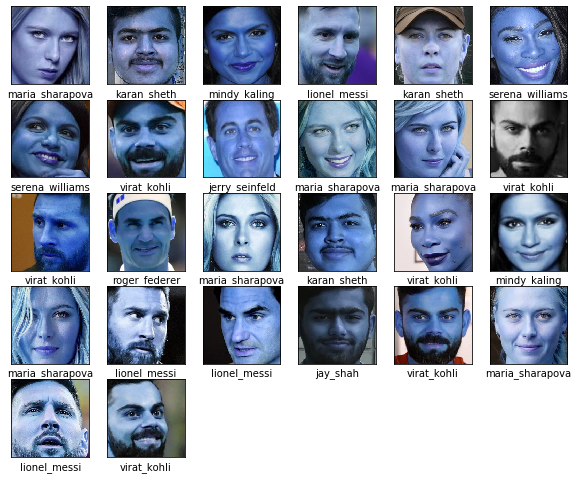

In [135]:
plt.figure(figsize=(10,10))
for i in range(total_test_img):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(pred_list[i])

In [136]:
import mysql.connector
import mysql.connector
from mysql.connector import Error

#establishing the connection
conn = mysql.connector.connect(host='localhost',
                                         database='attendance',
                                         user='root',
                                         password='jayshah1312')

cursor = conn.cursor()
for i in key_list:
    if i in unique_val:
        x = datetime.datetime.now()
        mydate = x.strftime("%x")
        mytime = x.strftime("%X")
        name = i
        mystr='P'
        sql = """INSERT INTO present_list 
                  (NAME,Presence,Date,Time) 
                   VALUES (%s, %s, %s, %s)"""
        data = (name,mystr,mydate,mytime)
        cursor.execute(sql,data)
        conn.commit()
    else:
        x = datetime.datetime.now()
        mydate = x.strftime("%x")
        mytime = x.strftime("%X")
        name = i
        mystr='A'
        sql = """INSERT INTO present_list 
                  (NAME,Presence,Date,Time) 
                   VALUES (%s, %s, %s, %s)"""
        data = (name,mystr,mydate,mytime)
        cursor.execute(sql,data)
        conn.commit()

conn.close()

In [ ]:
"""
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.5,minNeighbors=5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        print(roi_gray)
        roi_color = frame[y:y+h,x:x+w]
        id_,conf = model.predict(roi_color)
    
    cv2.imshow('Frame-1',frame)
    if cv2.waitKey(20) == ord('a'):
        break
    
cap.release()
cv2.destroyAllWindows()



with open("labels.pickle",'wb') as f:
    pickle.dump(num_dict,f)
facereg_model= model.to_yaml()
with open("labels.pickle",'rb') as f:
    og_labels = pickle.load(f)
    labels = {v:k for k,v in og_labels.items()}
"""